<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-application-college-task/blob/main/src/RandomForestClassifier_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deskripsi Dataset: Kualitas Anggur Merah "Vinho Verde"**

#### **1. Gambaran Umum Dataset**

Dataset yang digunakan dalam analisis ini adalah data kualitas anggur merah (*red wine*) dari varian "Vinho Verde" yang berasal dari Portugal. Dataset ini menyediakan informasi kuantitatif mengenai atribut fisikokimia yang didapat dari pengujian laboratorium dan penilaian sensorik berupa skor kualitas.

Penting untuk dicatat bahwa dataset ini tidak mencakup informasi mengenai jenis anggur, merek, atau harga jual, sehingga fokus analisis murni pada hubungan antara karakteristik fisikokimia dengan kualitas anggur yang dihasilkan. Permasalahan ini dapat didekati sebagai tugas regresi (memprediksi skor kualitas secara langsung) atau klasifikasi (mengelompokkan anggur ke dalam kategori kualitas tertentu), di mana pendekatan klasifikasi menjadi fokus dalam laporan ini.

#### **2. Sumber dan Sitasi**

Dataset ini merupakan koleksi publik yang tersedia di **UCI Machine Learning Repository** dan telah dibagikan kembali di platform **Kaggle** untuk kemudahan akses.
Berikut tautan dataset dari Kaggle yang kami gunakan:
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

#### **3. Deskripsi Variabel (Atribut)**

Dataset ini terdiri dari 11 variabel input (fitur) dan 1 variabel output (target). Semua fitur merupakan variabel numerik dengan tipe data `float64`.

**Variabel Input (Fitur Fisikokimia):**
1.  **`fixed acidity`** (Keasaman Tetap):
  - Mengukur konsentrasi asam-asam non-volatil (tidak mudah menguap) dalam anggur, seperti asam tartarat dan malat. Berkontribusi pada rasa "tajam" pada anggur. (Tipe Data: `float64`)
2.  **`volatile acidity`** (Keasaman Volatil):
  - Mengukur jumlah asam asetat dalam anggur. Tingkat yang terlalu tinggi dapat menyebabkan aroma dan rasa seperti cuka yang tidak diinginkan. (Tipe Data: `float64`)
3.  **`citric acid`** (Asam Sitrat)
  - Dalam jumlah kecil, asam sitrat dapat menambah kesegaran dan rasa "segar" pada anggur. (Tipe Data: `float64`)
4.  **`residual sugar`** (Sisa Gula):
  - Jumlah gula yang tersisa setelah proses fermentasi berhenti. Ini menentukan tingkat kemanisan anggur. (Tipe Data: `float64`)
5.  **`chlorides`** (Klorida):
  - Jumlah garam (khususnya natrium klorida) dalam anggur. (Tipe Data: `float64`)
6.  **`free sulfur dioxide`** (Belerang Dioksida Bebas):
  - Bagian dari SO₂ yang berada dalam bentuk bebas dan berfungsi sebagai antimikroba serta antioksidan untuk mencegah pembusukan. (Tipe Data: `float64`)
7.  **`total sulfur dioxide`** (Total Belerang Dioksida):
  - Gabungan dari belerang dioksida dalam bentuk bebas dan terikat. Berfungsi sebagai pengawet. (Tipe Data: `float64`)
8.  **`density`** (Kepadatan):
  - Kepadatan anggur yang umumnya mendekati kepadatan air, dipengaruhi oleh kandungan alkohol dan gula. (Tipe Data: `float64`)
9.  **`pH`**:
  - Mengukur tingkat keasaman atau kebasaan pada skala pH, yang memengaruhi rasa dan stabilitas anggur. Sebagian besar anggur memiliki pH antara 3 dan 4. (Tipe Data: `float64`)
10. **`sulphates`** (Sulfat):
  - Garam sulfat yang dapat berkontribusi pada efektivitas SO₂ dan memengaruhi rasa anggur. (Tipe Data: `float64`)
11. **`alcohol`** (Alkohol):
  - Persentase kandungan alkohol dalam anggur berdasarkan volume. (Tipe Data: `float64`)

**Variabel Output (Target Sensorik):**
12. **`quality`** (Kualitas):
  - Skor kualitas yang diberikan oleh ahli berdasarkan penilaian sensorik, dengan skala asli antara 0 hingga 10. Untuk tugas klasifikasi ini, variabel ini telah ditransformasikan menjadi kategori biner:
      - **1 (Baik)**: Jika skor asli >= 7
      - **0 (Buruk)**: Jika skor asli < 7

#### **4. Karakteristik Statistik dan Pembersihan Data**

Analisis eksplorasi data awal mengungkapkan beberapa karakteristik penting:
-   **Ukuran Data Awal**: Dataset ini pada awalnya berisi **1599 baris** data.
-   **Data Duplikat**: Teridentifikasi adanya **240 baris** data yang duplikat. Baris-baris ini telah dihapus untuk memastikan integritas data dalam pemodelan.
-   **Ukuran Data Final**: Setelah pembersihan, dataset yang digunakan untuk analisis terdiri dari **1359 baris dan 12 kolom**.
-   **Nilai Hilang**: **Tidak ditemukan** adanya nilai yang hilang (*missing values*) pada setiap kolom, sehingga tidak diperlukan proses imputasi.
-   **Distribusi dan Skala**: Ringkasan statistik menunjukkan bahwa rentang nilai dan skala antar fitur sangat bervariasi. Sebagai contoh, `total sulfur dioxide` memiliki nilai maksimum 289.0, sedangkan `chlorides` memiliki nilai maksimum 0.611.
-   **Keseimbangan Kelas**: Setelah variabel `quality` ditransformasikan menjadi kategori biner, teridentifikasi adanya **ketidakseimbangan kelas (*class imbalance*)**. Terdapat **1175 sampel** untuk anggur berkualitas "Buruk" (kelas 0) dan hanya **184 sampel** untuk anggur berkualitas "Baik" (kelas 1). Kondisi ini menjadi pertimbangan krusial dalam proses pemodelan, di mana strategi seperti *stratified sampling* dan penyesuaian bobot kelas (*class weighting*) diterapkan untuk mencegah model menjadi bias terhadap kelas mayoritas.

## **1. Import Library**

In [58]:
# Manipulasi dan Analisis Data
import pandas as pd
import numpy as np

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

# Pemuatan Dataset dari Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Pemodelan dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           classification_report, confusion_matrix, ConfusionMatrixDisplay,
                           roc_auc_score, roc_curve)

# Visualisasi Decision Tree
from sklearn.tree import export_graphviz
import graphviz

**Penjelasan Library yang digunaknan**

**1. pandas (pd)**  
- Digunakan untuk manipulasi dan analisis data.  
- Fungsi dalam proyek:  
  - Membaca dataset  
  - Mengolah data dalam bentuk `DataFrame`  
  - Membersihkan data (menghapus duplikat, memeriksa missing values)  
  - Memanipulasi kolom data  

**2. numpy (np)**  
- Digunakan untuk operasi numerik.  
- Meskipun tidak eksplisit, menjadi dasar operasi di library lain seperti pandas dan scikit-learn.  

**3. seaborn (sns)**  
- Library visualisasi data tingkat tinggi.  
- Fungsi: Membuat `histplot`, `boxplot`, dan `heatmap` untuk eksplorasi data. [1]  

**4. matplotlib.pyplot (plt)**  
- Library visualisasi data dasar.  
- Fungsi:  
  - Membuat dan mengatur plot  
  - Menambahkan judul, label, grid  
  - Menampilkan plot [1]  

**5. kagglehub**  
- Library untuk berinteraksi dengan Kaggle Hub.  
- Digunakan khusus untuk memuat dataset langsung dari Kaggle.  

**6. KaggleDatasetAdapter**  
- Adapter dari `kagglehub` untuk memuat dataset sebagai `DataFrame` pandas.  

**7. sklearn.model_selection.train_test_split**  
- Membagi dataset menjadi set **pelatihan** dan **pengujian**.  

**8. sklearn.model_selection.GridSearchCV**  
- Melakukan **hyperparameter tuning** dengan cross-validation.  

**9. sklearn.ensemble.RandomForestClassifier**  
- Model ML berbasis ensemble (gabungan decision tree).  
- Digunakan untuk klasifikasi kualitas anggur.  

**10. sklearn.metrics**  
- Modul metrik evaluasi performa model klasifikasi:  
  - `accuracy_score`, `precision_score`, `recall_score`  
  - `classification_report` (laporan presisi, recall, f1-score per kelas)  
  - `confusion_matrix` + `ConfusionMatrixDisplay` (visualisasi)  
  - `roc_auc_score` (AUC-ROC)  
  - `roc_curve` (menghitung FPR/TPR untuk plot ROC)  

**11. sklearn.tree.export_graphviz**  
- Menghasilkan representasi DOT dari decision tree.  

**12. graphviz**  
- Merender output `export_graphviz` menjadi gambar decision tree.  

## **2. Load data dan Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan memuat dataset dan melakukan beberapa langkah eksplorasi data awal untuk memahami karakteristik data yang kita miliki.

### **2.1 Memuat Dataset**

Dataset diunduh langsung dari Kaggle Hub menggunakan pustaka kagglehub.


In [59]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/red-wine-quality-cortez-et-al-2009",
  "winequality-red.csv"
)

display(df.head())

<ipython-input-59-92150c9e3da5>:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **2.2 Pemeriksaan Awal Data**

Kita akan melihat informasi dasar dari dataset seperti tipe data setiap kolom, jumlah entri, dan ringkasan statistiknya.


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Metode `df.info()` memberikan kita ringkasan singkat dan penting mengenai DataFrame (tabel data) yang baru saja kita muat. Ini adalah langkah pertama yang krusial dalam setiap proyek analisis data.

Dari output di atas, kita dapat menyimpulkan beberapa hal:

*   **Struktur Data**:
    *   Data kita memiliki **1599 baris** (*entries*) dan **12 kolom**. Ini memberikan gambaran awal tentang ukuran dataset.

*   **Kolom dan Tipe Data**:
    *   **`Non-Null Count`**: Semua kolom menunjukkan `1599 non-null`. Ini adalah kabar baik! Artinya, **tidak ada data yang hilang (*missing values*)** dalam dataset kita. Dengan demikian, kita tidak perlu melakukan penanganan data kosong seperti imputasi.
    *   **`Dtype`**: Menunjukkan tipe data setiap kolom.
        -   Terdapat **11 kolom** dengan tipe `float64` (angka desimal), yang cocok untuk atribut fisiko-kimia seperti `fixed acidity`, `alcohol`, dll.
        -   Ada **1 kolom** dengan tipe `int64` (bilangan bulat), yaitu kolom target kita, `quality`.

*   **Penggunaan Memori**:
    -   DataFrame ini menggunakan sekitar **150.0 KB** memori.

Secara keseluruhan, data ini terlihat "bersih" dari nilai yang hilang dan siap untuk tahap eksplorasi lebih lanjut.


In [61]:
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Metode `df.describe()` memberikan ringkasan statistik yang sangat berguna untuk kolom-kolom numerik. Dari sini, kita bisa mendapatkan pemahaman awal tentang pusat data, sebaran, dan potensi adanya nilai-nilai aneh (*outlier*).

Berikut adalah penjabaran dari setiap metrik yang ditampilkan:
- **`count`**: Jumlah baris data yang tidak kosong. Angka `1599` di semua kolom mengonfirmasi bahwa tidak ada nilai yang hilang.
- **`mean`**: Nilai rata-rata dari setiap kolom.
- **`std`** (Standar Deviasi): Mengukur seberapa tersebar data dari nilai rata-ratanya. Nilai `std` yang besar, seperti pada `total sulfur dioxide` (32.89), menunjukkan sebaran data yang luas.
- **`min`**: Nilai terkecil dalam kolom.
- **`25%`**: Kuartil pertama (Q1). 25% dari data memiliki nilai di bawah angka ini.
- **`50%`**: Median atau kuartil kedua (Q2). Ini adalah nilai tengah dari data, yang seringkali lebih representatif daripada `mean` jika ada outlier.
- **`75%`**: Kuartil ketiga (Q3). 75% dari data memiliki nilai di bawah angka ini.
- **`max`**: Nilai terbesar dalam kolom.

#### Pengamatan Kunci dari Statistik:

1.  **Potensi Outlier**
  - Terlihat perbedaan yang sangat signifikan antara nilai `75%` dan `max` pada beberapa fitur. Contohnya, pada **`total sulfur dioxide`**, nilai kuartil ke-3 adalah 62, namun nilai maksimumnya mencapai 289. Hal yang sama terlihat pada `residual sugar` dan `chlorides`. Ini adalah indikasi kuat adanya *outlier* yang perlu kita perhatikan.

2.  **Distribusi Data**
  - Untuk beberapa kolom seperti `residual sugar`, nilai `mean` (2.53) lebih tinggi dari `median/50%` (2.2). Ini mengindikasikan distribusi data yang miring ke kanan (*right-skewed*), yang berarti ada beberapa nilai yang sangat tinggi yang "menarik" rata-ratanya.

3.  **Variabel Target `quality`**
  - Kolom `quality` memiliki nilai rata-rata (`mean`) 5.63. Skornya berkisar dari 3 (`min`) hingga 8 (`max`), menunjukkan tidak ada anggur dengan kualitas sangat buruk atau sangat baik dalam dataset ini. Sebagian besar data terkumpul di tengah.

4.  **Skala Fitur**
  - Nilai pada kolom `total sulfur dioxide` jauh lebih besar dibandingkan `chlorides`. Ini menunjukkan bahwa penskalaan fitur (*feature scaling*) mungkin akan diperlukan sebelum melatih beberapa jenis model machine learning untuk memastikan setiap fitur memberikan kontribusi yang seimbang.

### **2.3 Data Cleaning: Duplikat dan Missing Value**

In [62]:
# Memeriksa data duplikat
print(f'Jumlah data duplikat :  {df.duplicated().sum()}')
print(f'Jumlah baris sebelum menghapus duplikat: {len(df)}')

# Menghapus data dupliksa
df.drop_duplicates(inplace=True)

# Memverifikasi setelah penanganan
print(f'Jumlah baris setelah menghapus duplikat : {len(df)}')

Jumlah data duplikat :  240
Jumlah baris sebelum menghapus duplikat: 1599
Jumlah baris setelah menghapus duplikat : 1359


In [63]:
# Memeriksa nilai yang hilang (missing values)
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Hasil di atas menunjukkan bahwa data sudah bersih dari nilai yang hilang.

### **2.4 Visualisasi Distribusi Fitur**


Visualisasi Distribusi Setiap Fitur:


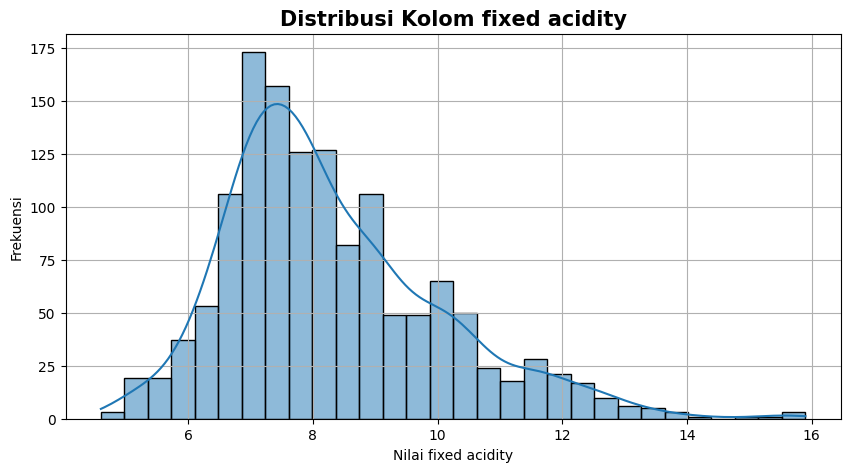

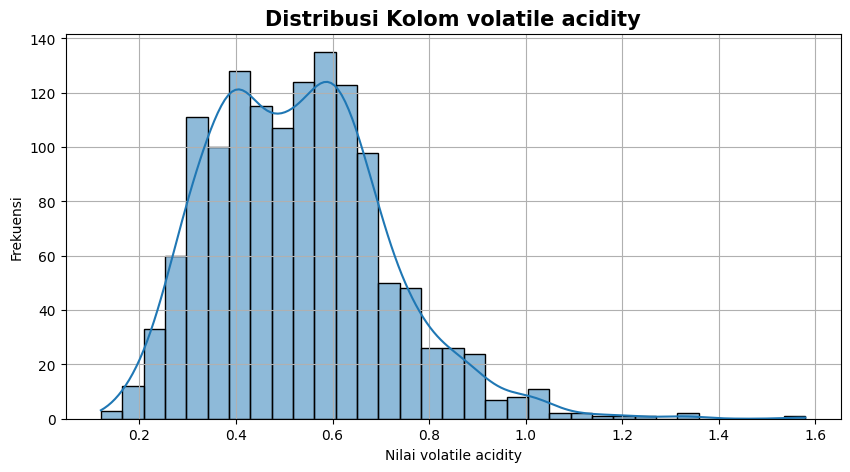

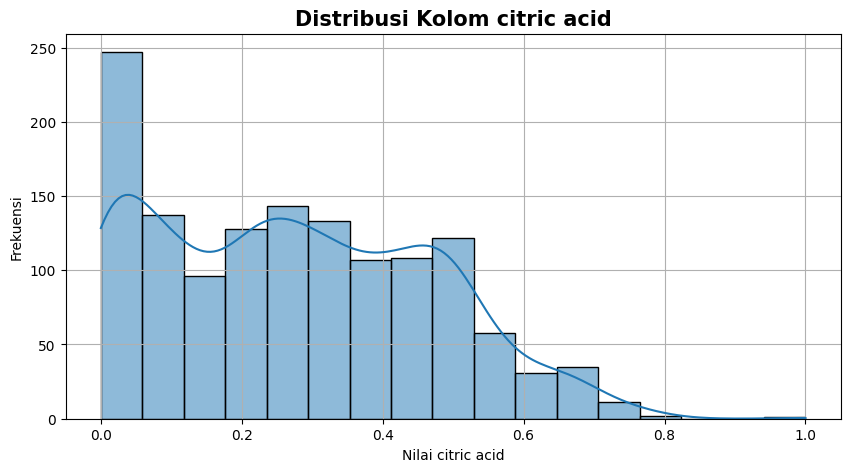

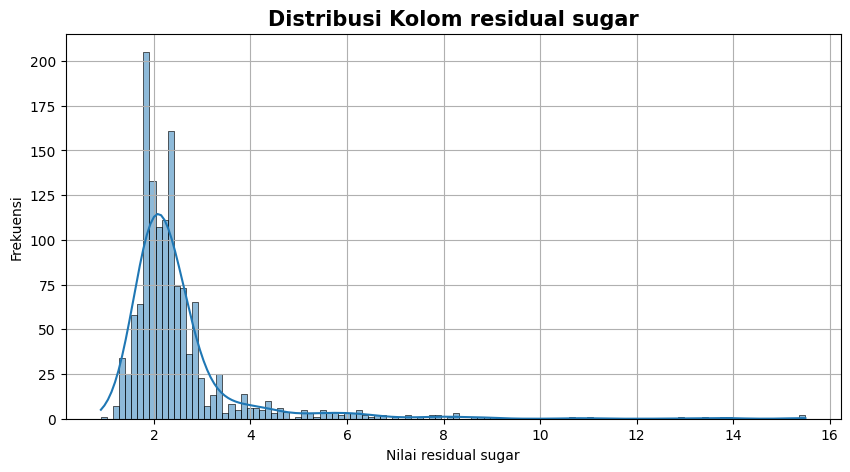

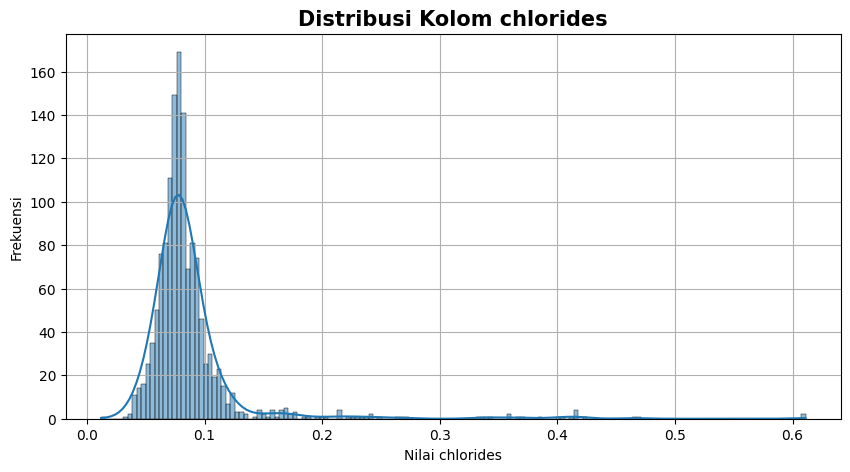

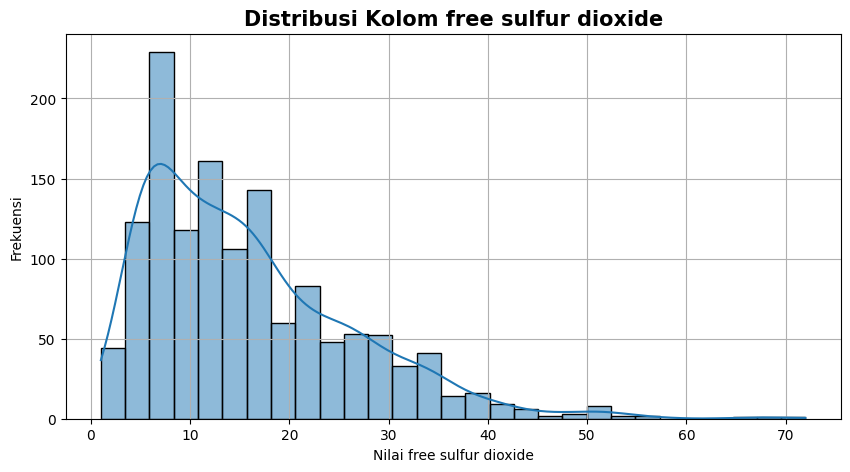

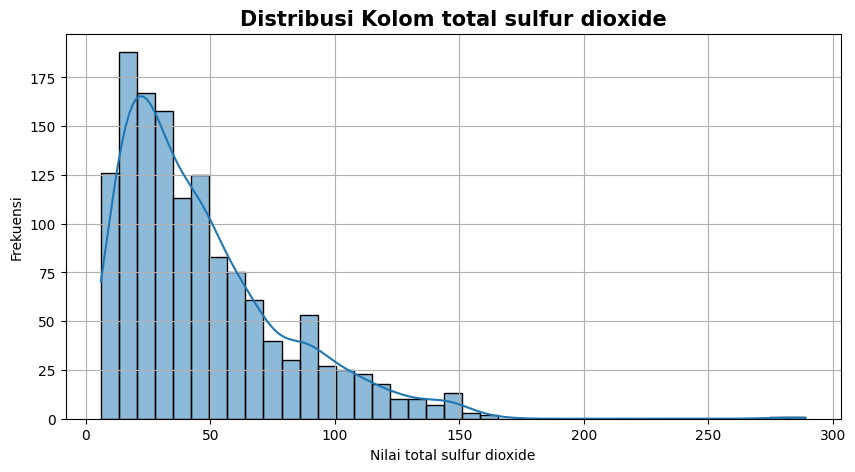

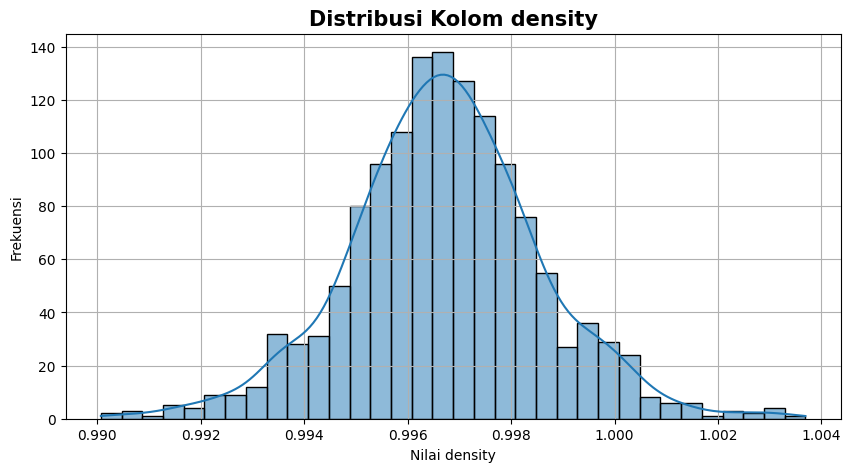

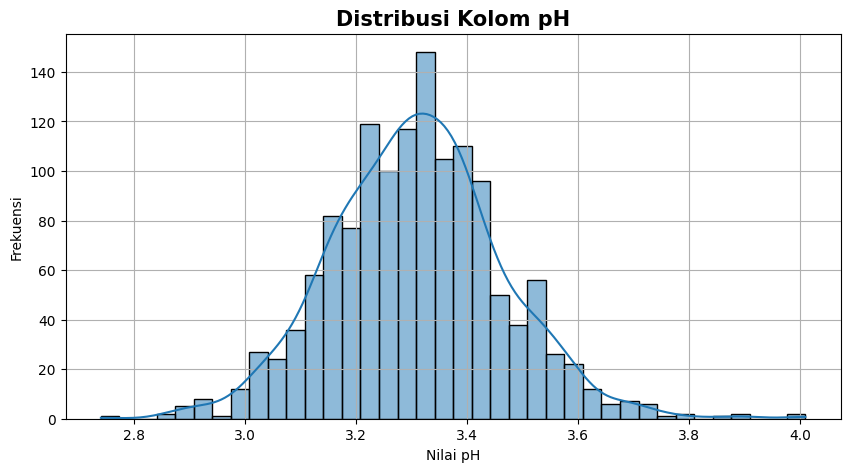

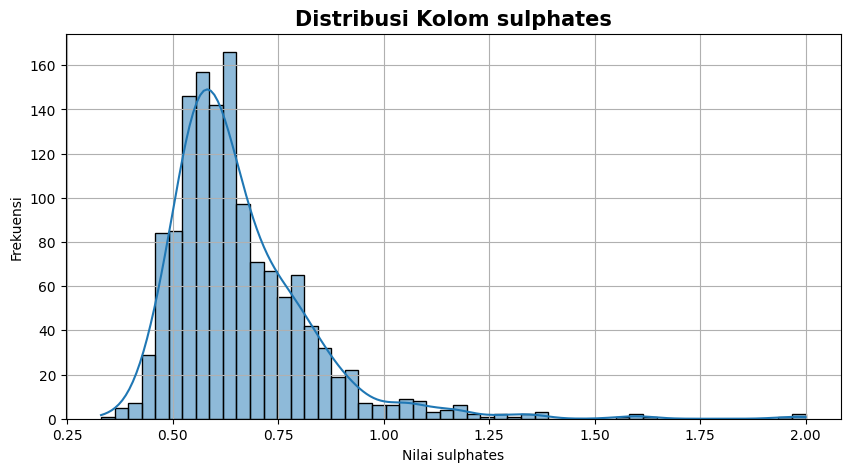

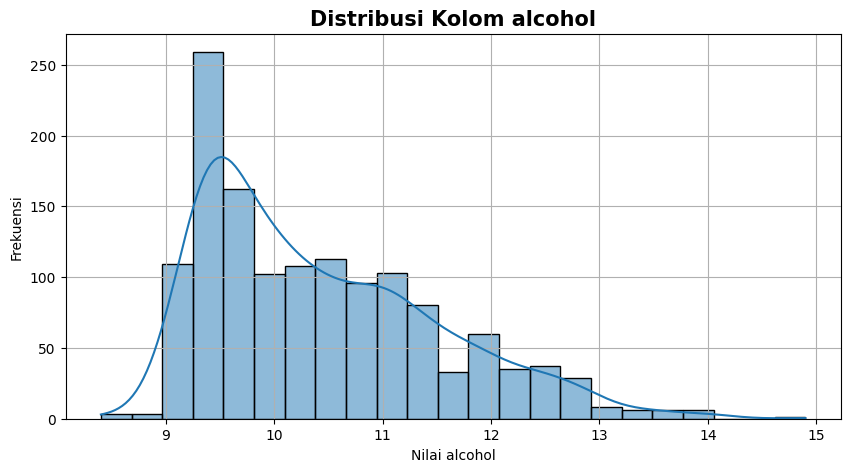

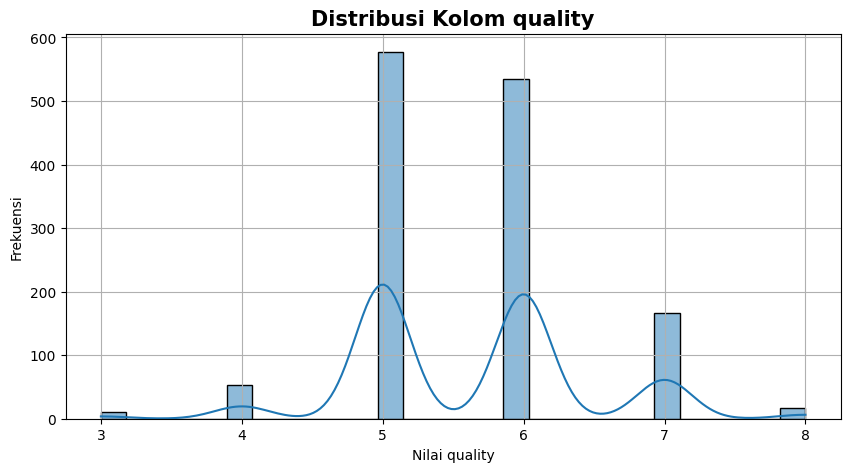

In [64]:
print("\nVisualisasi Distribusi Setiap Fitur:")
for column in df.columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Distribusi Kolom {column}', fontweight='bold', fontsize=15)
  plt.xlabel(f'Nilai {column}')
  plt.ylabel(f'Frekuensi')
  plt.grid(True)

Langkah ini penting untuk memahami karakteristik sebaran data pada setiap kolom secara visual. Dengan menggunakan **histogram** yang dilengkapi dengan kurva **Kernel Density Estimate (KDE)**, kita dapat melihat bentuk distribusi dan mengidentifikasi potensi adanya *outlier* atau kemiringan data (*skewness*).

#### Hasil Visualisasi & Pengamatan Kunci:

-   **Distribusi Normal**:
    -   Fitur `density`, `pH`, dan `fixed acidity` menunjukkan distribusi yang mendekati kurva normal (lonceng), meskipun tidak sempurna. Ini berarti sebagian besar nilai terpusat di sekitar rata-rata.

-   **Distribusi Miring ke Kanan (*Right-Skewed*)**:
    -   Banyak fitur yang distribusinya miring ke kanan. Ini terlihat dari "ekor" panjang di sisi kanan grafik.
    -   Fitur-fitur seperti `residual sugar`, `chlorides`, `free sulfur dioxide`, dan `total sulfur dioxide` menunjukkan kemiringan yang sangat jelas. Ini mengindikasikan bahwa sebagian besar anggur memiliki nilai rendah untuk atribut ini, namun ada beberapa sampel dengan nilai yang sangat tinggi (outlier).
    -   `alcohol` dan `sulphates` juga menunjukkan kemiringan ke kanan, menandakan mayoritas anggur memiliki kandungan alkohol dan sulfat yang moderat, dengan beberapa pengecualian yang nilainya lebih tinggi.
    
-   **Distribusi Bimodal**:
    -   `volatile acidity` menunjukkan dua puncak (bimodal), yang bisa berarti ada dua kelompok anggur yang berbeda dalam dataset berdasarkan keasaman volatilnya.

-   **Distribusi Target `quality`**:
    -   Grafik untuk kolom `quality` sangat jelas menunjukkan bahwa sebagian besar anggur dinilai dengan skor **5 dan 6**.
    -   Sangat sedikit anggur yang memiliki skor kualitas rendah (3) atau sangat tinggi (8). Ini adalah konfirmasi visual dari **ketidakseimbangan data**, di mana model mungkin akan lebih mudah mempelajari karakteristik anggur berkualitas rata-rata dibandingkan anggur yang sangat baik atau sangat buruk.

Secara umum, visualisasi ini memperkuat temuan dari analisis statistik sebelumnya dan memberikan wawasan penting tentang perlunya penskalaan fitur (karena rentang nilai yang berbeda) dan penanganan outlier/data miring untuk beberapa model machine learning.

### **2.5 Identifikasi Outliers**

Boxplot digunakan untuk melihat sebaran data dan mengidentifikasi adanya outliers (pencilan) pada setiap fitur.


Boxplot Individual untuk Setiap Fitur:


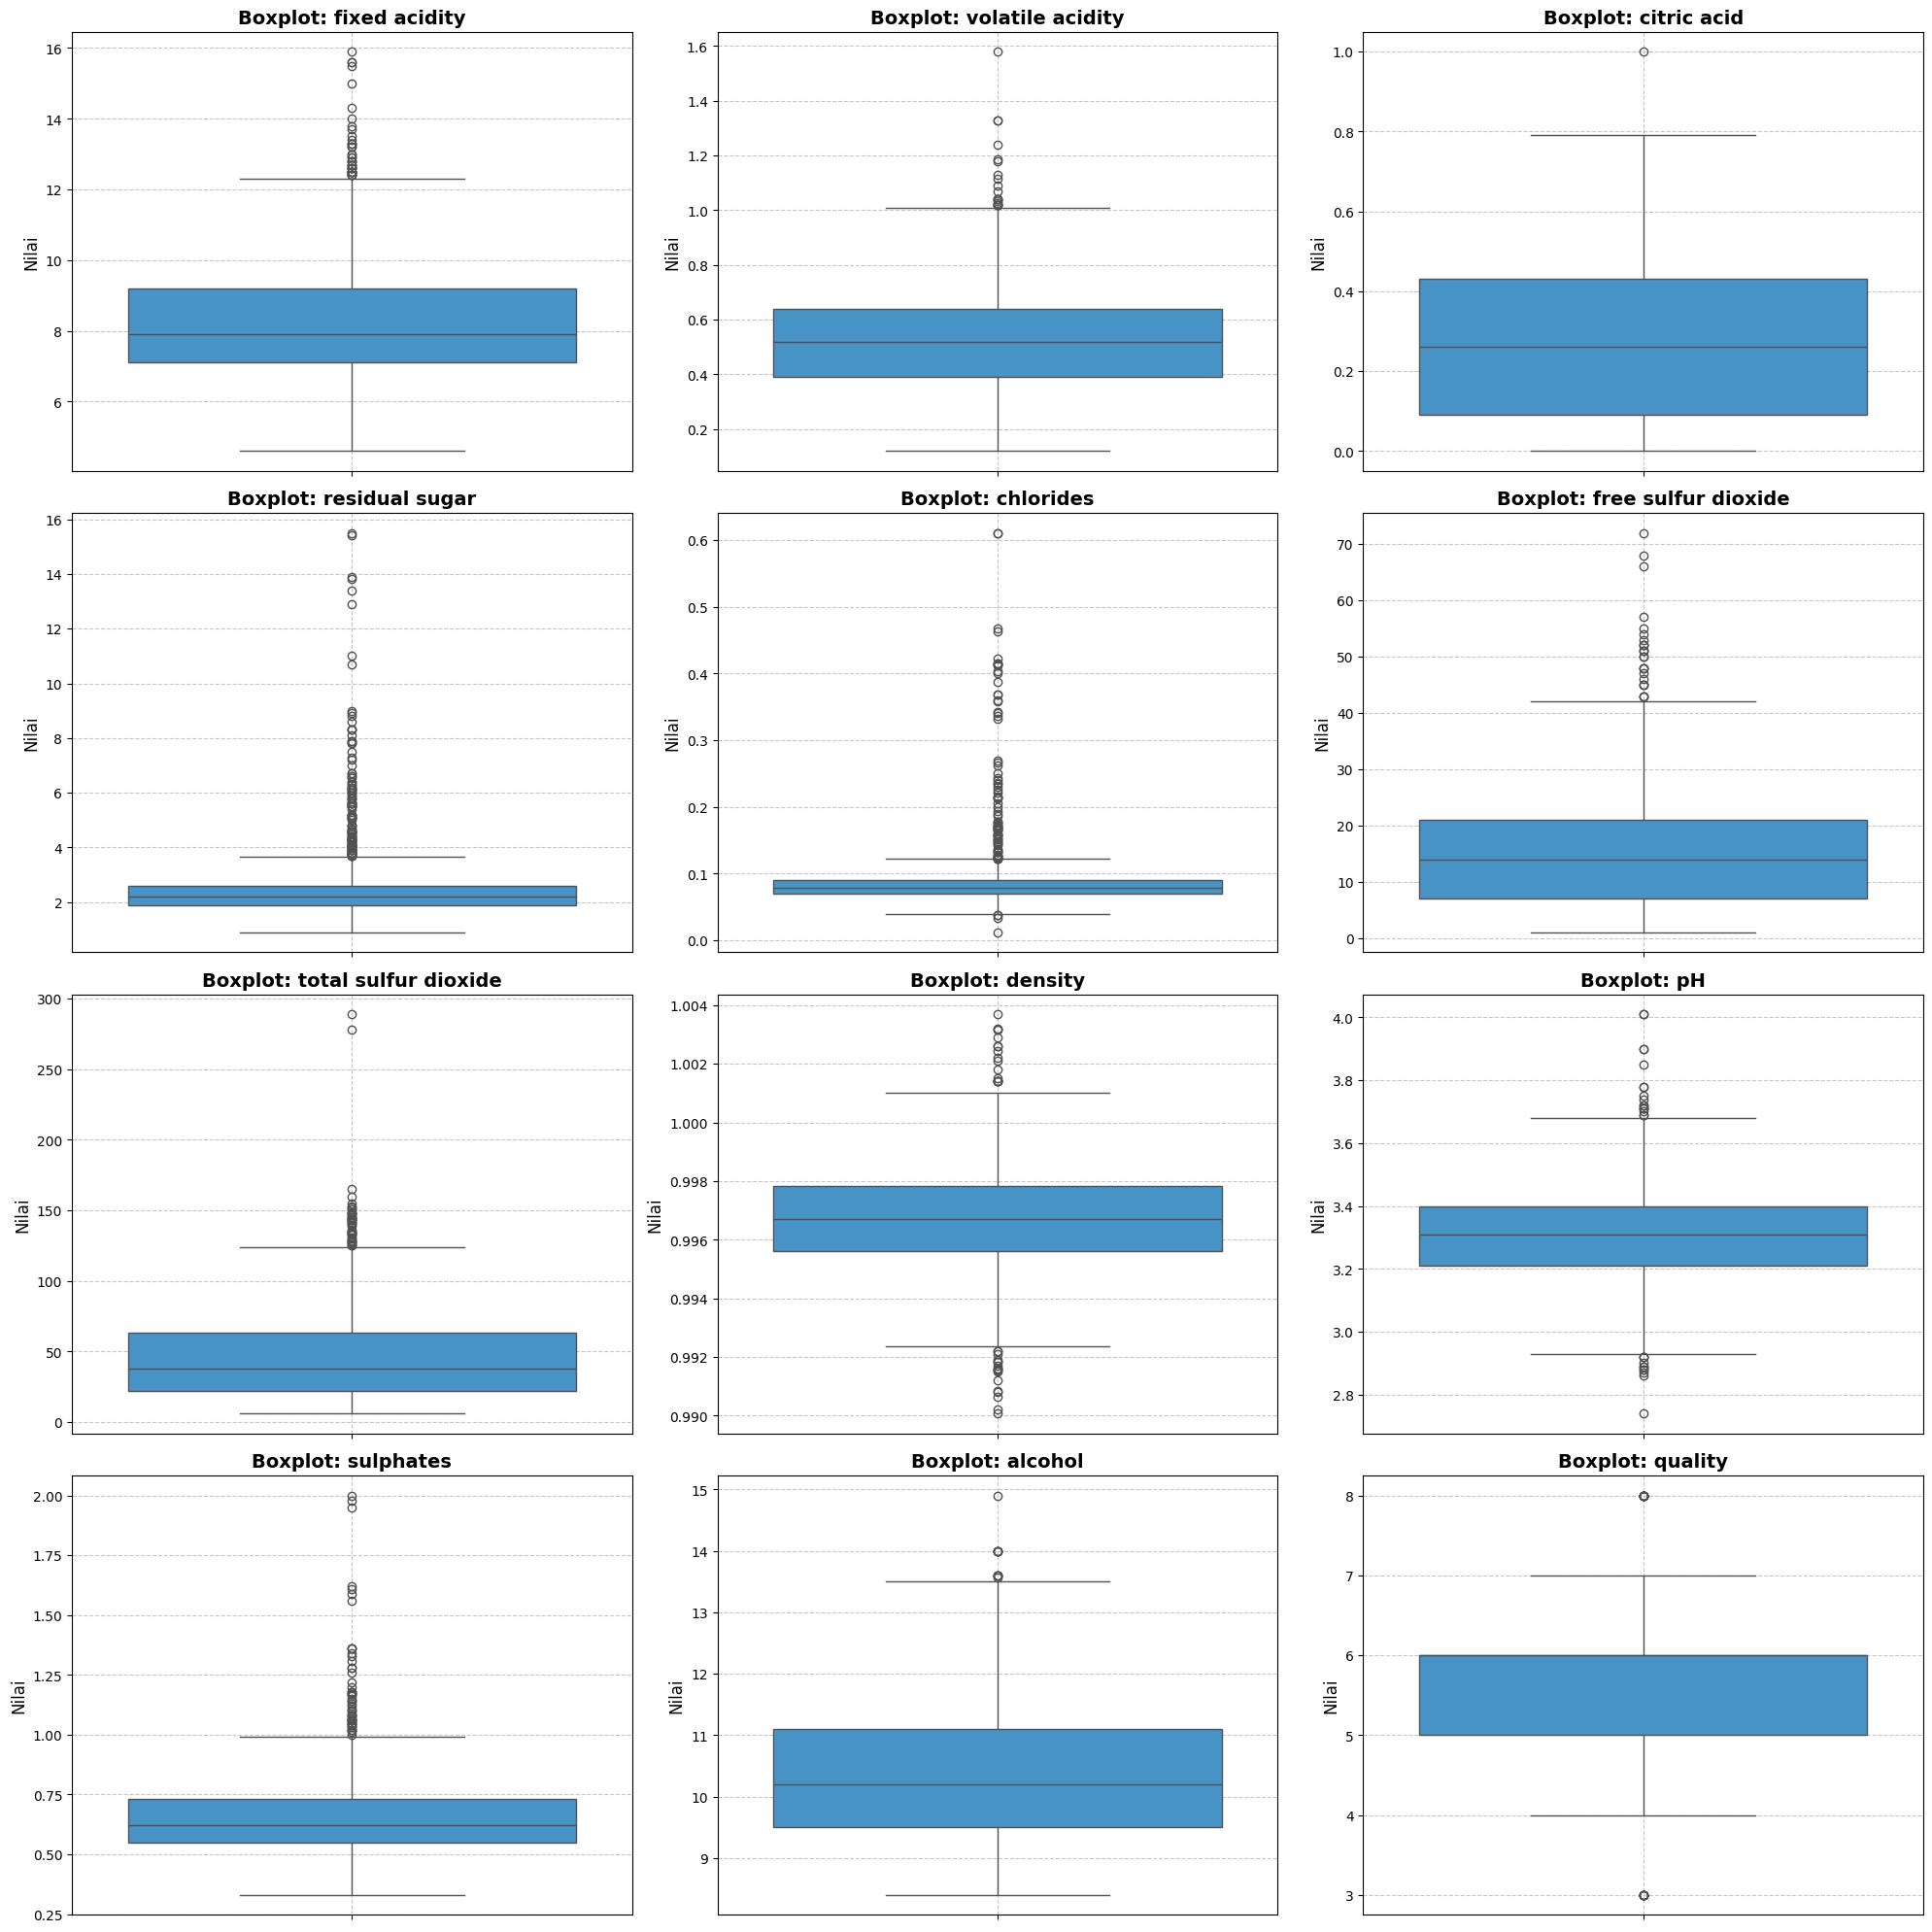

In [65]:
# Visualisasi Boxplot untuk setiap fitur secara individual
print("\nBoxplot Individual untuk Setiap Fitur:")
columns = df.columns
num_columns = len(columns)
num_rows = (num_columns + 2) // 3  # Atur 3 kolom per baris

plt.figure(figsize=(20, 5 * num_rows)) # Sesuaikan ukuran figure berdasarkan jumlah baris

for i, column in enumerate(columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=df[column], color='#3498db') # Menggunakan seaborn untuk tampilan yang lebih baik dan konsisten
    plt.title(f'Boxplot: {column}', fontsize=14, fontweight='bold')
    plt.ylabel('Nilai', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout() # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

**Boxplot** adalah alat visual yang sangat efektif untuk memahami sebaran data dan mengidentifikasi keberadaan **outliers** (pencilan) pada setiap fitur.

Setiap "kotak" dalam grafik ini merepresentasikan *Interquartile Range (IQR)*, yaitu rentang antara kuartil pertama (Q1 atau 25%) dan kuartil ketiga (Q3 atau 75%). Garis di tengah kotak adalah median (50%). Garis vertikal (disebut *whiskers*) memanjang dari kotak untuk menunjukkan rentang data, biasanya hingga 1.5 kali IQR. **Titik-titik di luar *whiskers*** adalah outlier.

#### Hasil Visualisasi & Pengamatan Kunci:

-   **Banyaknya Outlier**: Hampir semua fitur fisikokimia, kecuali `citric acid` dan `pH`, menunjukkan adanya outlier. Outlier paling ekstrem terlihat pada fitur `total sulfur dioxide`, `free sulfur dioxide`, dan `residual sugar`.

-   **Konfirmasi Kemiringan Data**: Adanya banyak outlier di sisi atas (*upper outliers*) pada fitur seperti `residual sugar`, `chlorides`, dan `sulphates` mengonfirmasi kembali bahwa distribusi data pada fitur-fitur ini sangat miring ke kanan (*right-skewed*).

-   **Fitur dengan Sebaran Normal**: Fitur `pH` dan `density` menunjukkan distribusi yang paling simetris (mendekati normal) dengan sedikit atau tanpa outlier yang signifikan. Ini menandakan bahwa sebagian besar nilai untuk fitur ini terpusat di tengah dengan sebaran yang wajar.

-   **Variabel Target `quality`**: Kolom `quality` juga memiliki outlier, yaitu pada nilai 3 dan 8, yang menegaskan bahwa anggur dengan kualitas sangat rendah atau sangat tinggi adalah kasus yang jarang terjadi dalam dataset ini.

#### Tindak Lanjut:
Kehadiran outlier ini penting untuk diketahui. Meskipun Random Forest secara umum cukup tahan (*robust*) terhadap outlier, keberadaannya bisa memengaruhi metrik statistik seperti rata-rata dan standar deviasi. Untuk model lain yang lebih sensitif, penanganan outlier mungkin diperlukan. Namun, untuk kasus ini, kita akan melanjutkan tanpa menghapus outlier terlebih dahulu, mengingat ketahanan alami dari model Random Forest.

### **2.6 Analisis Korelasi**

Heatmap korelasi menunjukkan hubungan linear antar variabel. Korelasi yang tinggi antara fitur-fitur independen (multikolinearitas) dapat memengaruhi interpretasi model.

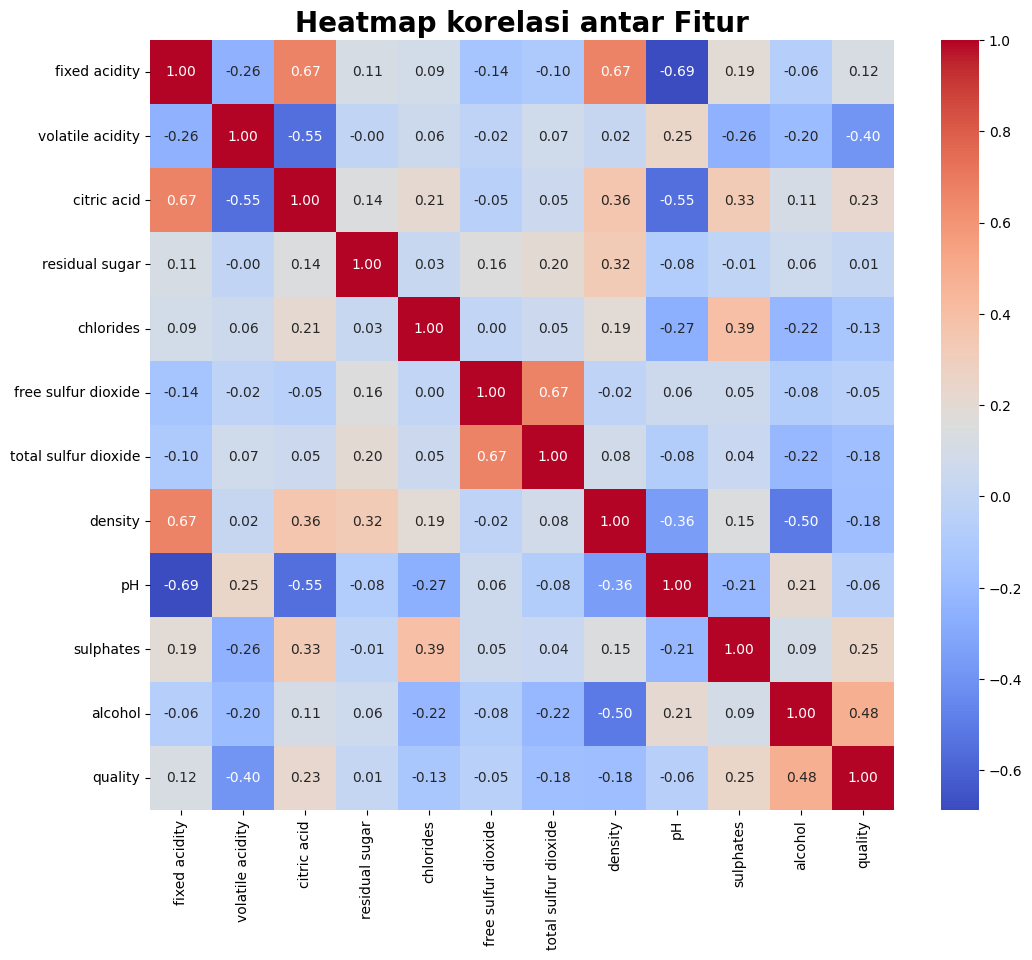

In [67]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap korelasi antar Fitur', fontsize=20, fontweight='bold')
plt.show()

## **3. Feature Engineering dan Data Splitting**

Pada bagian ini, kita akan mempersiapkan data untuk pemodelan.

### **3.1 Transformasi Variabel Target**

Sesuai dengan deskripsi dataset, kita akan mengubah masalah ini dari regresi menjadi klasifikasi. Kolom target quality akan diubah menjadi variabel biner:
- **`1` (Baik)**: Jika quality >= 7
- **`0` (Buruk)**: Jika quality < 7

In [68]:
# Mengubah kolom 'quality' menjadi kategori biner (0 = bad, 1 = good)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

print("Hasil transformasi kolom 'quality':")
df['quality'].head(10)

Hasil transformasi kolom 'quality':


,quality
0,0
1,0
2,0
3,0
5,0
6,0
7,1
8,1
9,0
10,0


### **3.2 Pemeriksaan Keseimbangan Kelas (Class Balance)**

Setelah transformasi, penting untuk memeriksa distribusi kelas pada variabel target. Ketidakseimbangan kelas dapat menyebabkan bias pada model.

Memeriksa distribusi kelas setelah transformasi

In [69]:
df['quality'].value_counts()

,count
quality,
0,1175
1,184


Visualisasi distribusi kelas

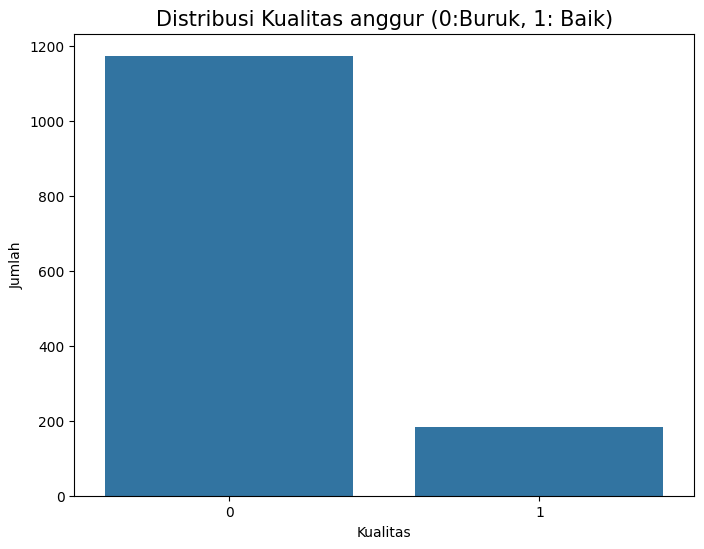

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="quality")
plt.title('Distribusi Kualitas anggur (0:Buruk, 1: Baik)', fontsize=15)
plt.xlabel('Kualitas')
plt.ylabel('Jumlah')
plt.show()

Terlihat jelas bahwa dataset ini tidak seimbang (imbalanced), di mana jumlah anggur berkualitas "buruk" (0) jauh lebih banyak daripada yang "baik" (1). Hal ini perlu diperhatikan saat melatih model.


### **3.3 Pemisahan Data (Train-Test Split)**


Kita akan memisahkan dataset menjadi data fitur (X) dan data target (y), kemudian membaginya menjadi set pelatihan dan set pengujian. Penggunaan stratify=y sangat penting untuk memastikan proporsi kelas pada data latih dan data uji sama dengan proporsi pada data asli, terutama pada kasus dataset tidak seimbang.


In [71]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Membagi data menjadi 80% data latih dan 20% data uji
# Menggunakan stratify=y untuk menjaga proporsi kelas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Ukuran X_train: {X_train.shape}')
print(f'Ukuran X_test: {X_test.shape}')

Ukuran X_train: (1087, 11)
Ukuran X_test: (272, 11)


In [72]:
# Melihat nilai X dan y
print("Nilai X:")
display(X)

Nilai X:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [73]:
print("Nilai y:")
display(y)

Nilai y:


,quality
0,0
1,0
2,0
3,0
5,0
...,...
1593,0
1594,0
1595,0
1597,0


### **4. Pelatihan Model dan Tuning Hyperparameter**

Kita akan menggunakan `GridSearchCV` untuk mencari kombinasi hyperparameter terbaik untuk model `RandomForestClassifier`. Ini membantu kita mendapatkan performa model yang paling optimal.


In [ ]:
# Menentukan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# Membuat model RandomForest. `class_weight='balanced'` digunakan untuk mengatasi masalah class imbalance.
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Menggunakan Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1, # Menggunakan semua core CPU yang tersedia
                           verbose=1
                           )

# Melatih model dengan Grid Search
grid_search.fit(X_train, y_train)

# Simpan model terbaik
best_rf = grid_search.best_estimator_

# Menampilka hyperparameter dan skor terbaik
print('\nHyperparameter terbaik:', grid_search.best_params_)
print('akurasi terbaik dari cross-validation:', grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


## **5. Evaluasi Model**


Setelah mendapatkan model terbaik, kita akan mengevaluasinya pada data uji yang belum pernah dilihat sebelumnya.


### **5.1 Laporan Klasifikasi & Confusion Matrix**


`Classification Report` memberikan rincian metrik seperti presisi, recall, dan f1-score untuk setiap kelas. `Confusion Matrix` memvisualisasikan performa klasifikasi (True Positive, True Negative, False Positive, False Negative).


In [ ]:
# Melakukan prediksi pada data uji
y_pred = best_rf.predict(X_test)

In [ ]:
# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

In [ ]:
# Membuat dan menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buruk', 'Baik']).plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=15, fontweight='bold')
plt.show()

### **5.2 Kurva ROC (Receiver Operating Characteristic)**

Kurva ROC adalah alat evaluasi yang sangat baik untuk masalah klasifikasi biner. Nilai AUC (Area Under the Curve) menunjukkan seberapa baik model dapat membedakan antara dua kelas. Semakin dekat nilainya ke 1, semakin baik modelnya.


In [ ]:
# Menghitung probabilitas prediksi
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
# Menghitung AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC score: {auc:.4f}")

In [ ]:
# Membuat plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Random forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Garis Acak')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC (Receive Operating Characteristic)', fontsize=15,
fontweight='bold')
plt.legend(loc='best')
plt.grid()
plt.show()

## **6. Analisis Kepentingan Fitur (Feature Importance)**


Random Forest memungkinkan kita untuk melihat fitur mana yang paling berpengaruh dalam membuat prediksi.


In [ ]:
# Membuat series yang menyimpan feature importance dari model dan feature names dari training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns.sort_values(ascending=False))

In [ ]:
# Membuat plot bar chart
plt.figure(figsize=(12, 8))
feature_importances_sorted = feature_importances.sort_values(ascending=False)
sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index)
plt.title('Peringkat Kepentingan Fitur', fontsize=16, fontweight='bold')
plt.xlabel('Skor Kepentingan')
plt.ylabel('Fitur')
plt.show()

In [ ]:
print('Fitur Paling Berpengaruh')
feature_importances.sort_values(ascending=False)

Seperti pada analisis korelasi, `alcohol` kembali menjadi fitur yang paling penting, diikuti oleh `chlorides` dan `total sulfur dioxide`.

## **7. Visualisasi Tree**

Untuk memahami bagaimana model membuat keputusan, kita bisa memvisualisasikan beberapa decision tree pertama dari Random Forest.


In [ ]:
# Visualisasi 3 pohon keputusan pertama dari model Random Forest
for i in range(3):
  tree = best_rf.estimators_[i]
  dot_data = export_graphviz(tree,
                             feature_names=X_train.columns,
                             class_names=['Buruk', 'Baik'],
                             filled=True,
                             max_depth=3,  # Membatasi kedalaman untuk visualisasi yang lebih sederhana
                             impurity=False,
                             proportion=True
                             )

  graph = graphviz.Source(dot_data)
  print(f'Visualisasi Pohon ke-{i+1}:')
  display(graph)

In [ ]:
# Hasil dari X_test dataframe yang digabung dengan prediksi dan target column yg asli(quality)
final_df = pd.concat([X_test.reset_index(drop=True),
                     y_test.reset_index(drop=True)], axis=1)
final_df['quality_prediction'] = pd.Series(y_pred)

# Print dataframe X_test dengan y_pred dan quality
print(f"Hasil prediksi dari X_test :")
display(final_df)

## **8. Simulasi Prediksi**


Untuk menunjukkan bagaimana model yang telah dilatih dapat digunakan dalam praktiknya, kita akan melakukan simulasi prediksi pada beberapa sampel data hipotetis. Di bawah ini disajikan tiga skenario input data yang berbeda untuk melihat bagaimana model memberikan prediksinya.


### **8.1 Mendefinisikan Fungsi Simulasi**


Pertama, kita akan membuat fungsi yang lebih modular. Fungsi ini akan menerima sebuah *dictionary* data sebagai input, melakukan prediksi, dan menampilkan hasilnya dengan rapi.


In [ ]:
def jalankan_simulasi_prediksi(data_input, nama_sampel):
  """
  Fungsi untuk menjalankan dan menampilkan hasil simulasi prediksi.

  Parameters:
  - data_input (dict): Dictionary yang berisi nilai fitur untuk satu sampel.
  - nama_sampel (str): Nama atau label untuk sampel yang diuji.
  """

  label_string = {0: "Buruk", 1: "Baik"}

  # Membuat DataFrame dari input
  df_sim = pd.DataFrame([data_input])

  # Melakukan prediksi menggunakan model terbaik
  prediksi = best_rf.predict(df_sim)
  prediksi_proba = best_rf.predict_proba(df_sim)

  # Menampilkan hasil
  print(f"\n\n--- Hasil Prediksi untuk {nama_sampel} ---")
  print("Data Input:")
  display(df_sim)

  kualitas_prediksi = prediksi[0]
  label_kualitas = label_string[kualitas_prediksi]
  prob_buruk = prediksi_proba[0][0]
  prob_baik = prediksi_proba[0][1]

  print(f"\nPrediksi Kualitas: {kualitas_prediksi} ({label_kualitas})")
  print(f"Keyakinan Model (Probabilitas):")
  print(f"  - Kualitas Buruk: {prob_buruk:.2%}")
  print(f"  - Kualitas Baik: {prob_baik:.2%}")
  print("-" * 40)

### **8.2 Menyiapkan Data Sampel untuk Simulasi**


Kita akan mendefinisikan tiga set data. Masing-masing set data ini memiliki karakteristik yang berbeda untuk menguji respon model.
1. **Sampel 1: Potensi Kualitas Baik**
Karakteristiknya mengarah pada anggur berkualitas baik (contoh: alkohol tinggi, keasaman volatil rendah).
2. **Sampel 2: Potensi Kualitas Buruk**
Karakteristiknya cenderung menghasilkan anggur berkualitas buruk (contoh: alkohol rendah, keasaman volatil tinggi).
3. **Sampel 3: Kualitas Ambigu/Tengah**
Karakteristik campuran yang membuat prediksi lebih menantang bagi model.

In [ ]:
# Skenario 1: Input dengan potensi kualitas "Baik"
sampel_baik = {
    'fixed acidity': 8.5,
    'volatile acidity': 0.35,
    'citric acid': 0.45,
    'residual sugar': 2.0,
    'chlorides': 0.07,
    'free sulfur dioxide': 15,
    'total sulfur dioxide': 40,
    'density': 0.995,
    'pH': 3.3,
    'sulphates': 0.75,
    'alcohol': 12.5  # Nilai alkohol tinggi
}

# Skenario 2: Input dengan potensi kualitas "Buruk"
sampel_buruk = {
    'fixed acidity': 7.0,
    'volatile acidity': 0.8, # Keasaman volatil tinggi
    'citric acid': 0.1,
    'residual sugar': 2.5,
    'chlorides': 0.09,
    'free sulfur dioxide': 8,
    'total sulfur dioxide': 60,
    'density': 0.998,
    'pH': 3.5,
    'sulphates': 0.5,
    'alcohol': 9.2 # Nilai alkohol rendah
}

# Skenario 3: Input dengan nilai rata-rata/ambigu
sampel_tengah = {
    'fixed acidity': 8.3,
    'volatile acidity': 0.53,
    'citric acid': 0.27,
    'residual sugar': 2.5,
    'chlorides': 0.08,
    'free sulfur dioxide': 16,
    'total sulfur dioxide': 47,
    'density': 0.996,
    'pH': 3.3,
    'sulphates': 0.65,
    'alcohol': 10.4
}

### **8.3 Menjalankan Simulasi**


Sekarang kita panggil fungsi yang telah dibuat untuk setiap sampel data.


In [ ]:
# Jalankan simulasi untuk setiap sampel
jalankan_simulasi_prediksi(sampel_baik, "Sampel Potensi Baik")
jalankan_simulasi_prediksi(sampel_buruk, "Sampel Potensi Buruk")
jalankan_simulasi_prediksi(sampel_tengah, "Sampel Ambigu")